# Analysis of Railway Transport Data of Ireland and its Comparison with other European Countries

This notebook demonstrates the data preparation, transformation, analysis and visualization of railway transports across Ireland and other European countries. 

In [3]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Using cached keras-3.0.1-py3-none-any.whl (999 kB)
     |████████████████████████████████| 153 kB 15.8 MB/s eta 0:00:01
  Using cached namex-0.0.7-py3-none-any.whl (5.8 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached rich-13.7.0-py3-none-any.whl (240 kB)
     |████████████████████████████████| 1.2 MB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 1.4 MB/s  eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installe

## Data Import & Preparation

Three railway transport datasets have been taken from the eurostat website. They have been imported separately in the notebook by mentioning the sheet being imported from the excel file in the pandas read_excel function. 

### Import and melting of df
In the next notebook cell, I have transformed a wide-format dataset, 'transport_passengers.xlsx,' into a long-format using Python and pandas. The dataset, initially structured with years as columns and countries as rows, has been melted into three columns: 'Country,' 'Year,' and 'Passenger Transport.' This conversion helps facilitate analysis and visualization of passenger transport trends over time. I have saved the resulting DataFrame as 'passengers_transported_melted.csv.

In [5]:
import pandas as pd

file_path = 'transport_passengers.xlsx'
sheet_name='Sheet1'
# Load the dataset into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Melt the DataFrame to convert it to a long format
melted_df = pd.melt(df, id_vars=['Country'], var_name='Year', value_name='Passenger Transport')

# Drop rows where 'Transport_values' is not specified (indicated by ':')
melted_df = melted_df[melted_df['Passenger Transport']!=':']

# Convert 'Year' column to numeric (remove non-numeric characters)
melted_df['Year'] = melted_df['Year'].astype(float)
melted_df['Passenger Transport']=melted_df['Passenger Transport'].astype(float)
#Saving the melted df
melted_df.to_csv('passengers_transported_melted.csv',index=False)
# Display the info of the resulting DataFrame
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 440
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              321 non-null    object 
 1   Year                 321 non-null    float64
 2   Passenger Transport  321 non-null    float64
dtypes: float64(2), object(1)
memory usage: 10.0+ KB


In [5]:
melted_df.describe()

,Year,Passenger Transport
count,321.000000,321.000000
mean,2016.358255,14915.479751
std,3.442292,25305.333199
min,2011.000000,25.000000
25%,2013.000000,827.000000
50%,2016.000000,4104.000000
75%,2019.000000,12800.000000
max,2022.000000,102814.000000


### Import and melting of df1
In the notebook, I executed a data transformation process for the 'Good_transport_rail.xlsx' dataset. After loading the data into a dataframe using pandas, I melted it to convert it from a wide to a long format. The resulting dataframe, named 'melted_df1,' was then cleansed by removing rows where 'Good Transport(kt)' values were not specified (denoted by ':'). The 'Year' column was converted to a numeric format, and the entire dataframe was saved as 'goods_transported_melted.csv.' The notebook also includes a display of the dataframe's info and descriptive statistics.

In [7]:
file_path = 'Good_transport_rail.xlsx'
sheet_name='Sheet 1'
# Load the dataset into a DataFrame
df1 = pd.read_excel(file_path, sheet_name=sheet_name)

# Melt the DataFrame to convert it to a long format
melted_df1 = pd.melt(df1, id_vars=['Country'], var_name='Year', value_name='Good Transport(kt)')

# Drop rows where 'Transport_values' is not specified (indicated by ':')
melted_df1 = melted_df1[melted_df1['Good Transport(kt)']!=':']

# Convert 'Year' column to numeric (remove non-numeric characters)
melted_df1['Year'] = melted_df1['Year'].astype(float)
melted_df1['Good Transport(kt)']=melted_df1['Good Transport(kt)'].astype(float)
#Saving the melted df
melted_df1.to_csv('goods_transported_melted.csv',index=False)
# Display the info of the resulting DataFrame
melted_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 455
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             362 non-null    object 
 1   Year                362 non-null    float64
 2   Good Transport(kt)  362 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.3+ KB


In [22]:
melted_df1.describe()

,Year,Good Transport(kt)
count,362.000000,362.000000
mean,2016.414365,56956.013812
std,3.433518,73853.472511
min,2011.000000,346.000000
25%,2013.000000,13179.750000
50%,2016.000000,38435.000000
75%,2019.000000,68003.000000
max,2022.000000,396326.000000


## Import & Preparation of df2
In the notebook, I performed data transformation on the 'Tot_len_rail_lines.xlsx' dataset. After loading the data into a dataframe using pandas, I melted it to convert from a wide to a long format. The resulting dataframe, named 'melted_df2,' was then cleansed by removing rows where 'Rail line length' values were not specified (denoted by ':'). The 'Year' column was converted to a numeric format, and the entire dataframe was saved as 'rail_line_len_transported_melted.csv.' The notebook also includes a display of the dataframe's info.

In [9]:
file_path = 'Tot_len_rail_lines.xlsx'
sheet_name='Sheet 1'
# Load the dataset into a DataFrame
df2 = pd.read_excel(file_path, sheet_name=sheet_name)

# Melt the DataFrame to convert it to a long format
melted_df2 = pd.melt(df2, id_vars=['Country'], var_name='Year', value_name='Rail line length')

# Drop rows where 'Transport_values' is not specified (indicated by ':')
melted_df2 = melted_df2[melted_df2['Rail line length']!=':']

# Convert 'Year' column to numeric (remove non-numeric characters)
melted_df2['Year'] = melted_df2['Year'].astype(float)
melted_df2['Rail line length']=melted_df2['Rail line length'].astype(float)
#Saving the melted df
melted_df2.to_csv('rail_line_len_transported_melted.csv',index=False)
# Display the info of the resulting DataFrame
melted_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 503
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           443 non-null    object 
 1   Year              443 non-null    float64
 2   Rail line length  443 non-null    float64
dtypes: float64(2), object(1)
memory usage: 13.8+ KB


In [26]:
melted_df2.describe()

,Year,Rail line length
count,443.000000,443.000000
mean,2016.553047,7058.963564
std,3.419899,8524.332158
min,2011.000000,204.150000
25%,2014.000000,1672.800000
50%,2017.000000,3624.000000
75%,2019.500000,10131.000000
max,2022.000000,39068.117000


## Import & Preparation of df3
In the notebook, I performed data transformation on the 'At_risk_pov_threshold.xlsx' dataset. After loading the data into a dataframe using pandas, I melted it to convert from a wide to a long format. The resulting dataframe, named 'melted_df3,' was then cleansed by removing rows where 'Rail line length' values were not specified (denoted by ':'). The 'Year' column was converted to a numeric format, and the entire dataframe was saved as 'At_risk_pov_threshold_melted.csv.' The notebook also includes a display of the dataframe's info.

In [11]:
file_path = 'At_risk_pov_threshold.xlsx'
sheet_name='Sheet 1'
# Load the dataset into a DataFrame
df3 = pd.read_excel(file_path, sheet_name=sheet_name)

# Melt the DataFrame to convert it to a long format
melted_df3 = pd.melt(df3, id_vars=['Country'], var_name='Year', value_name='Purchasing Power')

# Drop rows where 'Purchasing Power' is not specified (indicated by ':')
melted_df3 = melted_df3[melted_df3['Purchasing Power']!=':']

# Convert 'Year' column to numeric (remove non-numeric characters)
melted_df3['Year'] = melted_df3['Year'].astype(float)
melted_df3['Purchasing Power']=melted_df3['Purchasing Power'].astype(float)
#Saving the melted df
melted_df3.to_csv('At_risk_pov_threshold_melted.csv',index=False)
# Display the info of the resulting DataFrame
melted_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 441
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           410 non-null    object 
 1   Year              410 non-null    float64
 2   Purchasing Power  410 non-null    float64
dtypes: float64(2), object(1)
memory usage: 12.8+ KB


In [30]:
melted_df3.describe()

,Year,Purchasing Power
count,410.000000,410.000000
mean,2016.480488,8975.612195
std,3.389306,4100.084207
min,2011.000000,2145.000000
25%,2014.000000,5513.250000
50%,2016.500000,9188.500000
75%,2019.000000,12049.250000
max,2022.000000,19929.000000


## Import & Preparation of df4
In the notebook, I performed data transformation on the 'per_risk_pov_by_urb.xlsx' dataset. After loading the data into a dataframe using pandas, I melted it to convert from a wide to a long format. The resulting dataframe, named 'melted_df4,' was then cleansed by removing rows where 'Rail line length' values were not specified (denoted by ':'). The 'Year' column was converted to a numeric format, and the entire dataframe was saved as 'per_risk_pov_by_urb_melted.csv.' The notebook also includes a display of the dataframe's info.

In [13]:
file_path = 'per_risk_pov_by_urb.xlsx'
sheet_name='Cities'
# Load the dataset into a DataFrame
df4 = pd.read_excel(file_path, sheet_name=sheet_name)

# Melt the DataFrame to convert it to a long format
melted_df4 = pd.melt(df4, id_vars=['Country'], var_name='Year', value_name='% Pov risk by dou')

# Drop rows where '% Pov risk by dou' is not specified (indicated by ':')
melted_df4 = melted_df4[melted_df4['% Pov risk by dou']!=':']

# Convert 'Year' column to numeric (remove non-numeric characters)
melted_df4['Year'] = melted_df4['Year'].astype(float)
melted_df4['% Pov risk by dou']=melted_df4['% Pov risk by dou'].astype(float)
#Saving the melted df
melted_df4.to_csv('per_risk_pov_by_urb.csv',index=False)
# Display the info of the resulting DataFrame
melted_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 407
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            383 non-null    object 
 1   Year               383 non-null    float64
 2   % Pov risk by dou  383 non-null    float64
dtypes: float64(2), object(1)
memory usage: 12.0+ KB


In [34]:
melted_df4.describe()

,Year,% Pov risk by dou
count,383.000000,383.000000
mean,2016.488251,22.060052
std,3.422170,6.355580
min,2011.000000,8.100000
25%,2014.000000,17.950000
50%,2017.000000,21.200000
75%,2019.000000,25.500000
max,2022.000000,46.100000


## Import & Preparation of df5
In the notebook, I performed data transformation on the 'Distribution of pop for 18-64yrs.xlsx' dataset. After loading the data into a dataframe using pandas, I melted it to convert from a wide to a long format. The resulting dataframe, named 'melted_df5,' was then cleansed by removing rows where 'Distribution of pop for 18-64yrs' values were not specified (denoted by ':'). The 'Year' column was converted to a numeric format, and the entire dataframe was saved as 'Distribution of pop for 18-64yrs.csv.' The notebook also includes a display of the dataframe's info.

In [15]:
file_path = 'Distribution of pop for 18-64yrs.xlsx'
sheet_name='Sheet 1'
# Load the dataset into a DataFrame
df5 = pd.read_excel(file_path, sheet_name=sheet_name)

# Melt the DataFrame to convert it to a long format
melted_df5 = pd.melt(df5, id_vars=['Country'], var_name='Year', value_name='Pop Distribution')

# Drop rows where 'Pop Distribution' is not specified (indicated by ':')
melted_df5 = melted_df5[melted_df5['Pop Distribution']!=':']

# Convert 'Year' column to numeric (remove non-numeric characters)
melted_df5['Year'] = melted_df5['Year'].astype(float)
melted_df5['Pop Distribution']=melted_df5['Pop Distribution'].astype(int)
#Saving the melted df
melted_df5.to_csv('Distribution of pop_melted.csv',index=False)
# Display the info of the resulting DataFrame
melted_df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 430
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           410 non-null    object 
 1   Year              410 non-null    float64
 2   Pop Distribution  410 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 12.8+ KB


In [38]:
melted_df5.describe()

,Year,Pop Distribution
count,410.000000,410.000000
mean,2016.463415,62.441463
std,3.399249,2.248115
min,2011.000000,57.000000
25%,2014.000000,61.000000
50%,2016.000000,62.000000
75%,2019.000000,64.000000
max,2022.000000,70.000000


## Data Joining
The melted datasets have been joined together to form a new dataset using outer join.


In [17]:
# We have melted data frames melted_df, melted_df1, melted_df2

# Merge melted_df and melted_df1 on common columns 'Country' and 'Year'
merged_df = pd.merge(melted_df, melted_df1, on=['Country', 'Year'], how='outer')

# Merge the result with melted_df2, melted_df3,melted_df4 and melted_df5 on common columns 'Country' and 'Year'
merged_df1 = pd.merge(merged_df, melted_df2, on=['Country', 'Year'], how='outer')
merged_df2 = pd.merge(merged_df1, melted_df3, on=['Country', 'Year'], how='outer')
merged_df3 = pd.merge(merged_df2, melted_df4, on=['Country', 'Year'], how='outer')
final_merged_df = pd.merge(merged_df3, melted_df5, on=['Country', 'Year'], how='outer')
final_merged_df.to_csv('final_merged_df.csv',index=False)

In [18]:
# Display the head of the resulting data frame
final_merged_df.head()

,Country,Year,Passenger Transport,Good Transport(kt),Rail line length,Purchasing Power,% Pov risk by dou,Pop Distribution
0,Belgium,2011.0,10498.0,55876.0,3587.0,10895.0,25.5,62.0
1,Bulgaria,2011.0,2059.0,14152.0,4072.0,3499.0,38.6,65.0
2,Denmark,2011.0,6395.0,9276.0,2615.0,11510.0,18.9,61.0
3,Germany,2011.0,89316.0,374737.0,38712.0,11037.0,20.8,63.0
4,Estonia,2011.0,243.0,48378.0,1196.0,4491.0,20.9,64.0


## Data Summary

In [15]:
# Give info of the final merged df
final_merged_df.info()
# Descriptive statistics of the merged dataset
final_merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 0 to 478
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              479 non-null    object 
 1   Year                 479 non-null    float64
 2   Passenger Transport  321 non-null    float64
 3   Good Transport(kt)   362 non-null    float64
 4   Rail line length     443 non-null    float64
 5   Purchasing Power     410 non-null    float64
 6   % Pov risk by dou    383 non-null    float64
 7   Pop Distribution     410 non-null    float64
dtypes: float64(7), object(1)
memory usage: 33.7+ KB


,Year,Passenger Transport,Good Transport(kt),Rail line length,Purchasing Power,% Pov risk by dou,Pop Distribution
count,479.000000,321.000000,362.000000,443.000000,410.000000,383.000000,410.000000
mean,2016.498956,14915.479751,56956.013812,7058.963564,8975.612195,22.060052,62.441463
std,3.430039,25305.333199,73853.472511,8524.332158,4100.084207,6.355580,2.248115
min,2011.000000,25.000000,346.000000,204.150000,2145.000000,8.100000,57.000000
25%,2014.000000,827.000000,13179.750000,1672.800000,5513.250000,17.950000,61.000000
50%,2017.000000,4104.000000,38435.000000,3624.000000,9188.500000,21.200000,62.000000
75%,2019.000000,12800.000000,68003.000000,10131.000000,12049.250000,25.500000,64.000000
max,2022.000000,102814.000000,396326.000000,39068.117000,19929.000000,46.100000,70.000000


* Count ('Passenger Transport', 'Good Transport(kt)',   'Rail line length'): 
Indicates the number of non-null entries for each variable.
* Mean, Min, Max, and Standard Deviation: 
Provide measures of central tendency, minimum, maximum, and variability for each variable.

## Correlation analysis
To analyze the relationships between numeric variables, the correlation matrix using the .corr() function has been found:

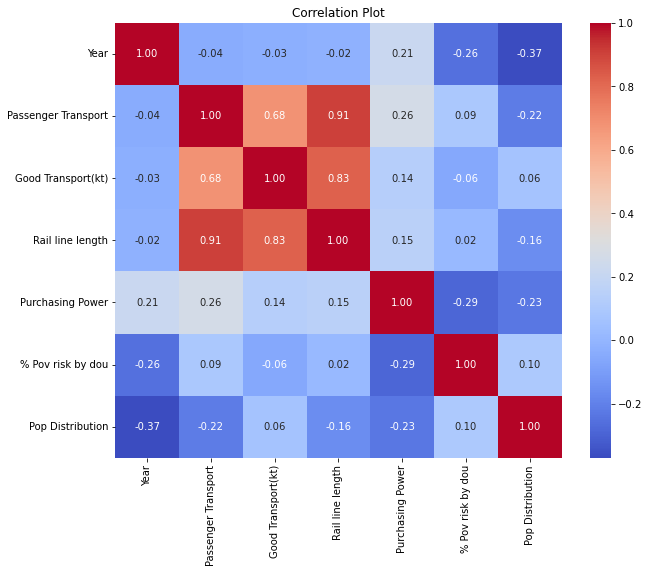

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix for the merged data frame 'final_merged_df'
correlation_matrix_transformed = final_merged_df.dropna().corr()
correlation_matrix_transformed
correlation_matrix_transformed.to_csv('correlation_matrix.csv',index=True)
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix_transformed, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Plot")
plt.show()

In [178]:
correlation_matrix_transformed

,Year,Passenger Transport,Good Transport(kt),Rail line length,Purchasing Power,% Pov risk by dou,Pop Distribution
Year,1.000000,-0.040861,-0.028548,-0.019098,0.214354,-0.257224,-0.371062
Passenger Transport,-0.040861,1.000000,0.680099,0.907995,0.261547,0.091954,-0.219262
Good Transport(kt),-0.028548,0.680099,1.000000,0.826080,0.136067,-0.060020,0.063019
Rail line length,-0.019098,0.907995,0.826080,1.000000,0.153147,0.019462,-0.157446
Purchasing Power,0.214354,0.261547,0.136067,0.153147,1.000000,-0.288314,-0.232972
% Pov risk by dou,-0.257224,0.091954,-0.060020,0.019462,-0.288314,1.000000,0.096815
Pop Distribution,-0.371062,-0.219262,0.063019,-0.157446,-0.232972,0.096815,1.000000


## Exploratory Data Analysis
This code snippet is responsible for the various visualization displayed in the report. 

## Passenger Transport by Country Across Years
This code generates a line plot using the Seaborn library to visualize the trend of passenger transport for selected countries across different years. The dataset is filtered to include only the chosen countries, and rows with null values in the 'Passenger Transport' column are excluded. The style is set to "whitegrid" for a clean background. The line plot illustrates how the passenger transport values change over the years, with each country represented by a distinct color and marked with circular data points. The legend is positioned to the upper left outside the plot for clarity. The x-axis represents the years, the y-axis represents the passenger transport values, and each line corresponds to a specific country, allowing for a comparative analysis of their transportation trends.

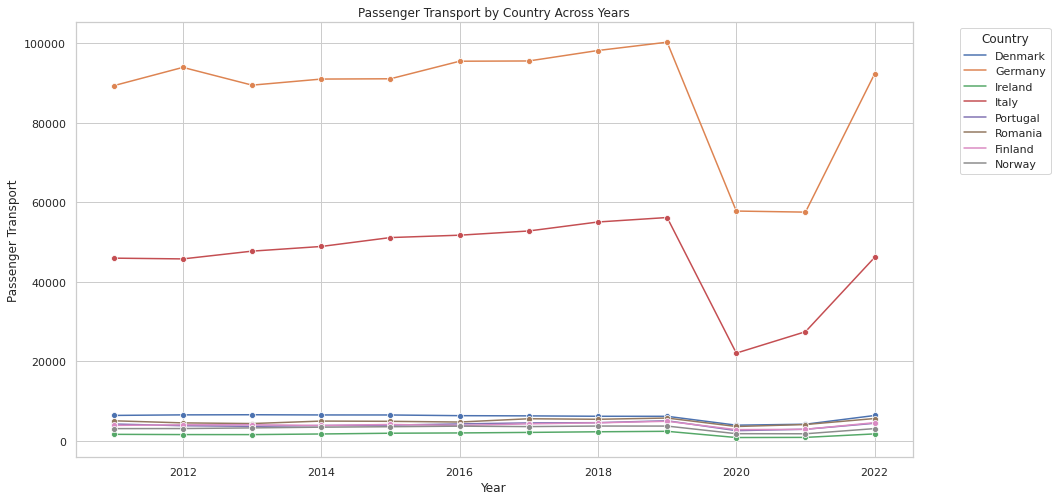

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter the dataset to include only selected countries
# List of countries to include in visualizations
selected_countries = ['Ireland', 'Germany', 'Denmark', 'Norway', 'Turkiye', 'Portugal', 'Finland', 'Italy', 'Romania']
selected_df = final_merged_df[final_merged_df['Country'].isin(selected_countries)]
# Drop rows with null values in the 'Passenger Transport' column
filtered_df = selected_df.dropna(subset=['Passenger Transport'])

# Set the style for seaborn
sns.set(style="whitegrid")

# Line Plot - Passenger Transport by Country Across Years (excluding null values)
plt.figure(figsize=(15, 8))
sns.lineplot(x="Year", y="Passenger Transport", hue="Country", data=filtered_df, marker="o")
plt.title("Passenger Transport by Country Across Years")
plt.xlabel("Year")
plt.ylabel("Passenger Transport")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Good Transport (kt) Across Years
This code generates a line plot using Seaborn to visualize the trend of goods transport (in kilotons) for selected countries across different years. The dataset is filtered to include only the chosen countries, and rows with null values in the 'Good Transport(kt)' column are excluded. The line plot illustrates how the values of goods transport change over the years, with each country represented by a distinct color. The x-axis represents the years, the y-axis represents the goods transport values in kilotons, and each line corresponds to a specific country. This allows for a comparative analysis of the trends in goods transport for the selected countries over time. The plot is formatted with a title, labels for the x and y-axes, and a legend indicating the country represented by each line. The figure size is set to (12, 6) for optimal visualization.

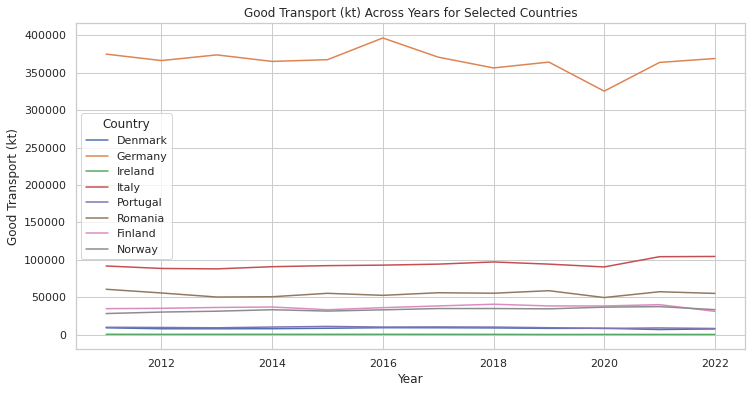

In [21]:
# Drop rows with null values in the 'Passenger Transport' column
filtered_df = selected_df.dropna(subset=['Good Transport(kt)'])
# Line plot for 'Good Transport (kt)' across the years for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Good Transport(kt)', hue='Country', data=selected_df)
plt.title('Good Transport (kt) Across Years for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Good Transport (kt)')
plt.show()

### Rail Line Length Across Years
This code creates a bar plot for the comparison of Ireland and the top 5 countries with the highest total rail line length, with each bar representing the total rail line length. Annotations are added on top of each bar to display the highest rail line length and the corresponding year.

/tmp/ipykernel_109/1505001031.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_countries=top_5_countries.append(pd.Series({'Ireland': total_rail_lengths['Ireland']}))


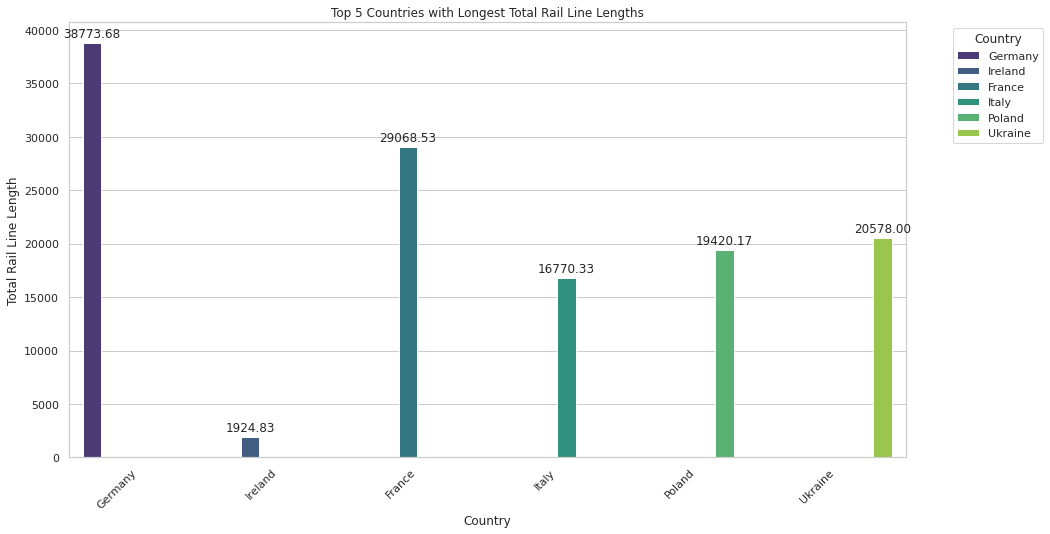

In [23]:
# Group the DataFrame by 'Country' and calculate the mean rail line length for each country
total_rail_lengths = melted_df2.groupby('Country')['Rail line length'].mean()
# Sort the countries based on total rail line length in descending order
sorted_countries = total_rail_lengths.sort_values(ascending=False)
# Get the top 5 countries
top_5_countries = sorted_countries.head(5)
# Include Ireland with the top 5 countries
top_5_countries=top_5_countries.append(pd.Series({'Ireland': total_rail_lengths['Ireland']}))
# Get the corresponding comparison data for Ireland and top 5 countries
ire_top5_data= melted_df2[melted_df2['Country'].isin(top_5_countries.index)]
# Set the style for seaborn
sns.set(style="whitegrid")
# Bar Plot - Comparison of Ireland with top 5 Countries with Longest Rail Line Lengths
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(x='Country', y="Rail line length", hue="Country", data=ire_top5_data, ci=None, palette='viridis')
# Annotate each bar with the total rail line length
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2f}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title("Top 5 Countries with Longest Total Rail Line Lengths")
plt.xlabel("Country")
plt.ylabel("Total Rail Line Length")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
max_rail_lengths = ire_top5_data.groupby('Country')['Rail line length'].max()

In this code, a data frame melted_df2 is grouped by 'Country,' and the maximum rail line length for each country is calculated. The countries are then sorted based on their total rail line length in descending order, and the top 5 countries are selected. Additionally, Ireland is included in the top 5 countries. The corresponding data for Ireland and the top 5 countries are extracted from the original data frame. Using seaborn, a bar plot is created to visually compare the rail line lengths of Ireland with the top 5 countries. Each bar is annotated with its respective rail line length, and the plot is styled with a white grid background and a viridis color palette. The legend is displayed in the upper left corner, and x-axis labels are rotated for better readability. The resulting plot provides a clear comparison of the rail line lengths between Ireland and the top 5 countries.

### Purchasing power standard across years for below 60% median equalized income


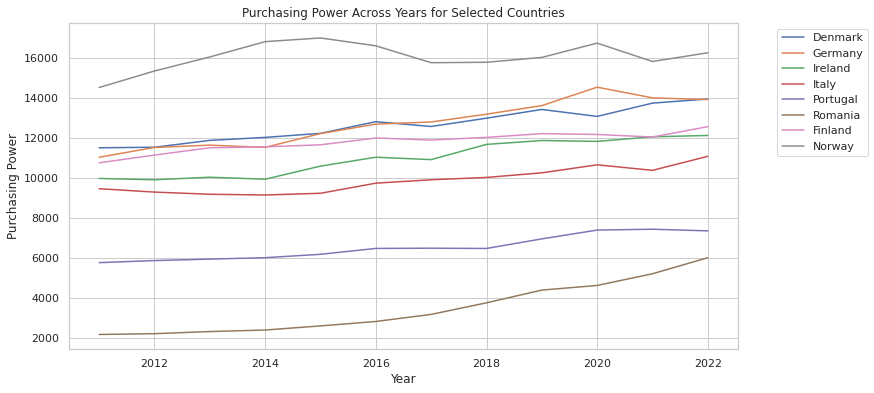

In [27]:
filtered_df = selected_df.dropna(subset=['Purchasing Power'])
# Line plot for 'Purchasing Power' across the years for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Purchasing Power', hue='Country', data=filtered_df)
plt.title('Purchasing Power Across Years for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Purchasing Power')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()

### Percentage Poverty Risk By Degree of Urbanization

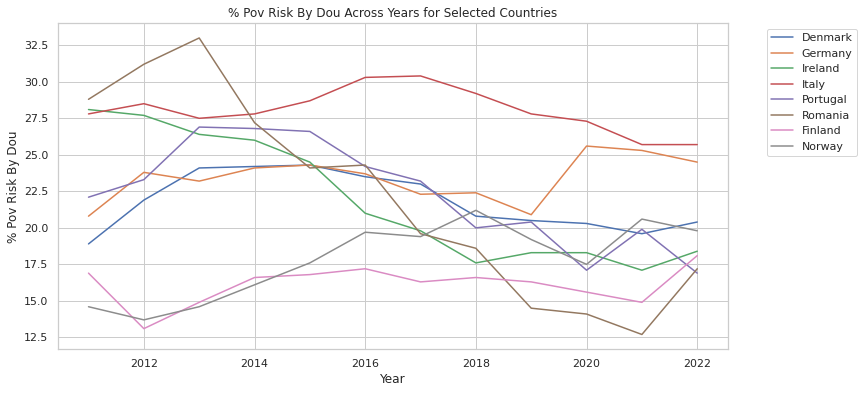

In [29]:
# Line plot for '% Pov Risk By Dou' across the years for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='% Pov risk by dou', hue='Country', data=selected_df)
plt.title('% Pov Risk By Dou Across Years for Selected Countries')
plt.xlabel('Year')
plt.ylabel('% Pov Risk By Dou')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()

### Population Distribution acrosss the year for 18-64 yrs old 

/tmp/ipykernel_109/1531585730.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_countries=top_5_countries.append(pd.Series({'Ireland': total_rail_lengths['Ireland']}))


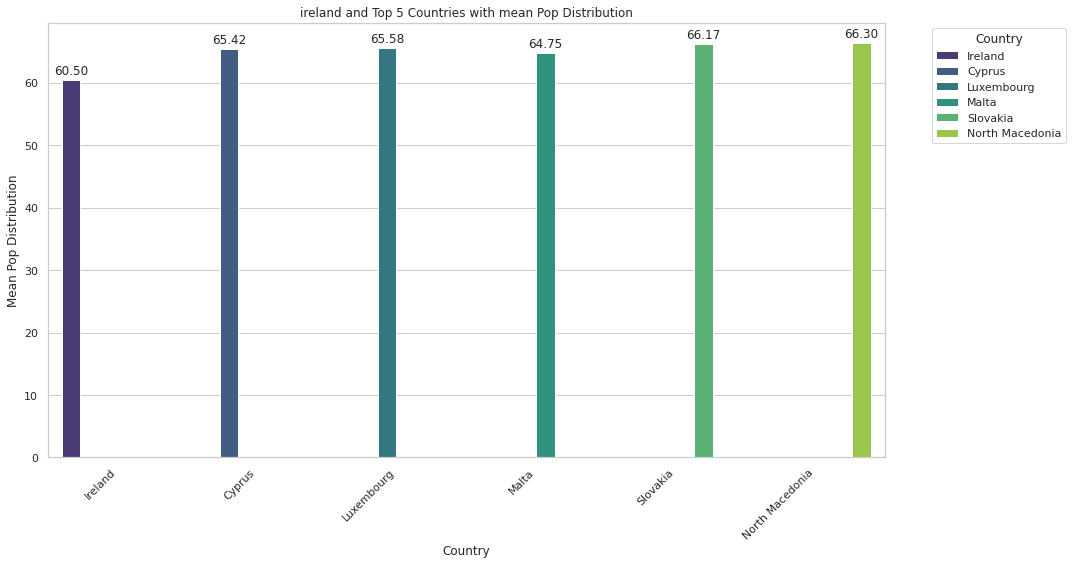

In [31]:
# Group the DataFrame by 'Country' and 'Year' and calculate the mean pop distribution for each group
grouped_df = melted_df5.groupby(['Country'])['Pop Distribution'].mean()

# Group the DataFrame by 'Country' and calculate the mean Pop Distribution for each country
mean_Pop_Distribution = melted_df5.groupby('Country')['Pop Distribution'].mean()
# Sort the countries based on mean Pop Distribution in descending order
sorted_countries = mean_Pop_Distribution.sort_values(ascending=False)
# Get the top 5 countries
top_5_countries = sorted_countries.head(5)
# Include Ireland with the top 5 countries
top_5_countries=top_5_countries.append(pd.Series({'Ireland': total_rail_lengths['Ireland']}))
# Get the corresponding comparison data for Ireland and top 5 countries
ire_top5_data= melted_df5[melted_df5['Country'].isin(top_5_countries.index)]
# Set the style for seaborn
sns.set(style="whitegrid")
# Bar Plot - Comparison of Ireland with top 5 Countries with Longest Rail Line Lengths
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(x='Country', y='Pop Distribution', hue="Country", data=ire_top5_data, ci=None, palette='viridis')
# Annotate each bar with the total rail line length
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2f}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title("ireland and Top 5 Countries with mean Pop Distribution")
plt.xlabel("Country")
plt.ylabel("Mean Pop Distribution")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

,Country,Year,Passenger Transport,Good Transport(kt),Rail line length,Purchasing Power,% Pov risk by dou,Pop Distribution
0,Belgium,2011.0,10498.0,55876.0,3587.0,10895.0,25.5,62.0
1,Bulgaria,2011.0,2059.0,14152.0,4072.0,3499.0,38.6,65.0
2,Denmark,2011.0,6395.0,9276.0,2615.0,11510.0,18.9,61.0
3,Germany,2011.0,89316.0,374737.0,38712.0,11037.0,20.8,63.0
4,Estonia,2011.0,243.0,48378.0,1196.0,4491.0,20.9,64.0
...,...,...,...,...,...,...,...,...
474,Malta,2020.0,NaN,NaN,NaN,11254.0,19.3,65.0
475,Cyprus,2021.0,NaN,NaN,NaN,11001.0,18.1,65.0
476,Malta,2021.0,NaN,NaN,NaN,11407.0,22.1,65.0
477,Cyprus,2022.0,NaN,NaN,NaN,11831.0,18.7,65.0


#### Determination of non-linearity

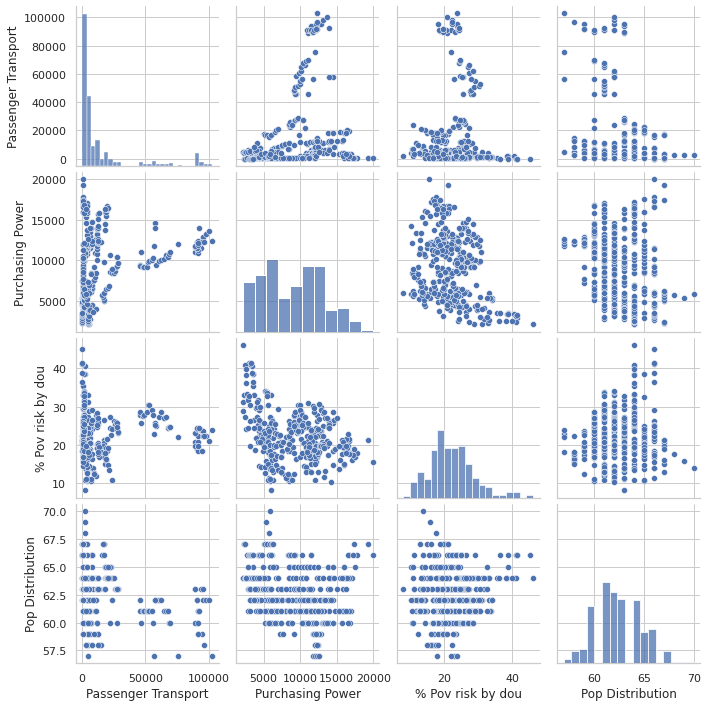

In [33]:
# Select variables of interest
variables_of_interest1 = ['Passenger Transport', 'Purchasing Power', '% Pov risk by dou', 'Pop Distribution']
variables_of_interest2 = ['Good Transport(kt)', 'Purchasing Power', '% Pov risk by dou','Pop Distribution' ]
# Pair plot for scatter plots
sns.pairplot(final_merged_df[variables_of_interest1])
plt.show()

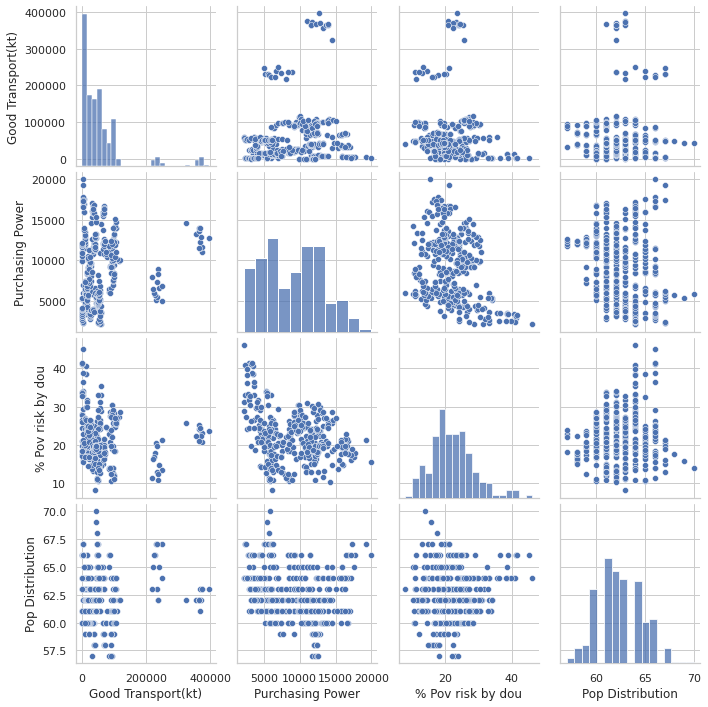

In [37]:
# Pair plot for scatter plots
sns.pairplot(final_merged_df[variables_of_interest2])
plt.show()

## Hypothesis testing using ML model

#### Random Forest model
The Random Forest regression model is employed to predict two target variables: Passenger Transport and Good Transport(kt). The following steps outline the implementation:

* Feature and Target Variable Selection:
Features include Passenger Transport, Good Transport(kt), Pop Distribution, % Pov risk by dou, and Purchasing Power.
Target variables are Passenger Transport and Good Transport(kt).
* Data Splitting:
The dataset is divided into features (X) and target variables (y1 for Passenger Transport, y2 for Good Transport(kt)).
* Train-Test Split:
The data is split into training and testing sets using a test size of 20%.
Random Forest Model Creation:
Two Random Forest models (rf_model1 and rf_model2) are created with 100 decision trees each.
* Model Training:
The models are trained on the training data (X_train, y1_train, y2_train).
* Prediction:
Predictions are made on the test data (X_test), resulting in predicted values for Passenger Transport (y1_pred) and Good Transport(kt) (y2_pred).
* Evaluation:
The Mean Squared Error (MSE) is calculated to assess the performance of the models.
* Results Display:
The MSE values for Passenger Transport and Good Transport(kt) are printed, providing insights into the accuracy of the predictions.
This process leverages the Random Forest algorithm, an ensemble learning method, to model the relationship between the selected features and the target variables, facilitating accurate predictions for transportation-related metrics. Adjusting parameters and features can further refine the model for specific analytical needs.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
final_merged_df=final_merged_df.dropna()
# Select numerical features to standardize and use in the model
numerical_features = ['Passenger Transport', 'Good Transport(kt)', 'Pop Distribution', '% Pov risk by dou', 'Purchasing Power']
target_variable1 = 'Passenger Transport'
target_variable2 = 'Good Transport(kt)'

# Create a StandardScaler object
scaler = StandardScaler()
# Select the countries to include in the model
select_countries = ['Ireland', 'Germany', 'Denmark', 'Turkiye', 'Portugal', 'Italy']
# Fit the scaler on the numerical features and transform the data
final_merged_df1= final_merged_df[final_merged_df['Country'].isin(select_countries)]
final_merged_df1[numerical_features] = scaler.fit_transform(final_merged_df1[numerical_features])

# Split the data into features and target variables
X = final_merged_df1[numerical_features]
y1 = final_merged_df1[target_variable1]
y2 = final_merged_df1[target_variable2]

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Create Random Forest models
rf_model1 = RandomForestRegressor(random_state=42)
rf_model2 = RandomForestRegressor(random_state=42)

# Train the models
rf_model1.fit(X_train, y1_train)
rf_model2.fit(X_train, y2_train)

# Make predictions
y1_pred = rf_model1.predict(X_test)
y2_pred = rf_model2.predict(X_test)

# Evaluate the models
mse1 = mean_squared_error(y1_test, y1_pred)
mse2 = mean_squared_error(y2_test, y2_pred)

# Display the MSE
print(f'{target_variable1} MSE: {mse1}')
print(f'{target_variable2} MSE: {mse2}')


/tmp/ipykernel_95/2521596706.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_df1[numerical_features] = scaler.fit_transform(final_merged_df1[numerical_features])


Passenger Transport MSE: 0.007833713158767382
Good Transport(kt) MSE: 0.0006498322457673382


#### Polynomial Ridge Regression
 In this specific implementation using Python and scikit-learn, the following steps were taken:

* Data Preparation:
The dataset (final_merged_df1) was split into numerical features (X) and two target variables (y1 and y2), corresponding to Passenger Transport and Good Transport(kt).
* Train-Test Split:
The data was further split into training and testing sets (X_train, X_test, y1_train, y1_test, y2_train, y2_test) using a test size of 20% and a random seed for reproducibility.
* Model Creation:
Polynomial Ridge Regression models were created for both target variables using scikit-learn's make_pipeline and PolynomialFeatures along with Ridge().
* Model Training:
The models were trained using the training data (X_train, y1_train, y2_train).
* Prediction:
Predictions were made on the test data (X_test) using the trained models.
* Evaluation:
Mean Squared Error (MSE) was calculated to evaluate the performance of the models on the test data for both target variables.
* Results Display:
The MSE values for both target variables were printed to the console.
The purpose of this Polynomial Ridge Regression is to capture potential non-linear relationships between the socio-economic features and the transportation variables (Passenger Transport and Good Transport(kt)), providing a more flexible model compared to traditional linear regression. The degree of the polynomial was set to 2 in this implementation.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
# Split the data into features and target variables
X = final_merged_df1[numerical_features]
y1 = final_merged_df1[target_variable1]
y2 = final_merged_df1[target_variable2]

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Create Polynomial Ridge Regression models
degree = 2  # Set the degree of the polynomial
ridge_model1 = make_pipeline(PolynomialFeatures(degree), Ridge())
ridge_model2 = make_pipeline(PolynomialFeatures(degree), Ridge())

# Train the models
ridge_model1.fit(X_train, y1_train)
ridge_model2.fit(X_train, y2_train)

# Make predictions
y1_pred = ridge_model1.predict(X_test)
y2_pred = ridge_model2.predict(X_test)

# Evaluate the models
mse1 = mean_squared_error(y1_test, y1_pred)
mse2 = mean_squared_error(y2_test, y2_pred)

# Display the MSE
print(f'{target_variable1} MSE: {mse1}')
print(f'{target_variable2} MSE: {mse2}')

Passenger Transport MSE: 0.002018919456239212
Good Transport(kt) MSE: 0.004437901844478362


### Time Series Forecasting

In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


### Forecasted values of Ireland

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Subset data for selected countries
selected_df = final_merged_df[final_merged_df['Country']=='Germany']

# Extract relevant columns
data = selected_df[['Year','Passenger Transport', 'Good Transport(kt)', '% Pov risk by dou','Purchasing Power']]

# Use 'Year' as the index
data.set_index('Year', inplace=True)

# Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Prepare data for LSTM
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Set the time steps for LSTM
time_steps = 5  # Increase the number of time steps

# Create LSTM datasets
X, y = create_dataset(scaled_data, time_steps)

# Reshape input data to be 3D [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], data.shape[1]))

# Build the LSTM model with Dropout layers
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))  # Add Dropout layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))  # Add Dropout layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))  # Add Dropout layer
model.add(Dense(units=data.shape[1]))  # Output layer with the same number of features

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32)  # Increase the number of epochs

# Make predictions for multiple future time steps
num_forecast_steps = 10  # Set the number of forecast steps
forecast = []

for step in range(num_forecast_steps):
    last_data = scaled_data[-time_steps:]
    last_data = np.reshape(last_data, (1, time_steps, data.shape[1]))
    step_forecast = model.predict(last_data)
    scaled_data = np.vstack([scaled_data, step_forecast])
    forecast.append(step_forecast)

# Invert the scaling to get actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(num_forecast_steps, data.shape[1]))

# Create a dataframe with the forecasted values
forecast_df = pd.DataFrame(forecast, columns=data.columns)

# Print or use forecast_df for further analysis
forecast_df

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.3375
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 1.3241
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3232
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3081
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3038
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2884
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2909
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2689
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2540
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2524
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2403
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2254
Epoch 13/100
1/1 [==============================] - 0s 8ms/st

,Passenger Transport,Good Transport(kt),% Pov risk by dou,Purchasing Power
0,92432.343750,373739.93750,23.957380,13428.899414
1,90798.632812,369114.03125,23.727116,13237.551758
2,92237.960938,361689.09375,22.706591,12828.354492
3,63515.375000,337686.93750,24.538843,13672.260742
4,54730.570312,340995.40625,25.364019,13838.110352
5,74377.773438,353198.87500,24.406927,13738.910156
6,90310.312500,365704.53125,23.495508,13247.813477
7,94081.125000,373311.53125,23.287001,12809.047852
8,94443.156250,372281.68750,22.950632,12513.937500
9,93509.523438,365386.59375,22.741051,12743.919922


### Forecasted values of Denmark

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Subset data for selected countries
selected_df = final_merged_df[final_merged_df['Country']=='Germany']

# Extract relevant columns
data = selected_df[['Year','Passenger Transport', 'Good Transport(kt)', '% Pov risk by dou','Purchasing Power']]

# Use 'Year' as the index
data.set_index('Year', inplace=True)

# Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Prepare data for LSTM
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Set the time steps for LSTM
time_steps = 5  # Increase the number of time steps

# Create LSTM datasets
X, y = create_dataset(scaled_data, time_steps)

# Reshape input data to be 3D [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], data.shape[1]))

# Build the LSTM model with Dropout layers
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))  # Add Dropout layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))  # Add Dropout layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))  # Add Dropout layer
model.add(Dense(units=data.shape[1]))  # Output layer with the same number of features

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32)  # Increase the number of epochs

# Make predictions for multiple future time steps
num_forecast_steps = 10  # Set the number of forecast steps
forecast = []

for step in range(num_forecast_steps):
    last_data = scaled_data[-time_steps:]
    last_data = np.reshape(last_data, (1, time_steps, data.shape[1]))
    step_forecast = model.predict(last_data)
    scaled_data = np.vstack([scaled_data, step_forecast])
    forecast.append(step_forecast)

# Invert the scaling to get actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(num_forecast_steps, data.shape[1]))

# Create a dataframe with the forecasted values
forecast_df = pd.DataFrame(forecast, columns=data.columns)

# Print or use forecast_df for further analysis
forecast_df

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.3375
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 1.3241
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3232
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3081
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3038
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2884
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2909
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2689
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2540
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2524
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2403
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2254
Epoch 13/100
1/1 [==============================] - 0s 8ms/st

,Passenger Transport,Good Transport(kt),% Pov risk by dou,Purchasing Power
0,92432.343750,373739.93750,23.957380,13428.899414
1,90798.632812,369114.03125,23.727116,13237.551758
2,92237.960938,361689.09375,22.706591,12828.354492
3,63515.375000,337686.93750,24.538843,13672.260742
4,54730.570312,340995.40625,25.364019,13838.110352
5,74377.773438,353198.87500,24.406927,13738.910156
6,90310.312500,365704.53125,23.495508,13247.813477
7,94081.125000,373311.53125,23.287001,12809.047852
8,94443.156250,372281.68750,22.950632,12513.937500
9,93509.523438,365386.59375,22.741051,12743.919922


### Forecasted Values of Germany

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Subset data for selected countries
selected_df = final_merged_df[final_merged_df['Country']=='Germany']

# Extract relevant columns
data = selected_df[['Year','Passenger Transport', 'Good Transport(kt)', '% Pov risk by dou','Purchasing Power']]

# Use 'Year' as the index
data.set_index('Year', inplace=True)

# Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Prepare data for LSTM
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Set the time steps for LSTM
time_steps = 5  # Increase the number of time steps

# Create LSTM datasets
X, y = create_dataset(scaled_data, time_steps)

# Reshape input data to be 3D [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], data.shape[1]))

# Build the LSTM model with Dropout layers
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))  # Add Dropout layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))  # Add Dropout layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))  # Add Dropout layer
model.add(Dense(units=data.shape[1]))  # Output layer with the same number of features

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32)  # Increase the number of epochs

# Make predictions for multiple future time steps
num_forecast_steps = 10  # Set the number of forecast steps
forecast = []

for step in range(num_forecast_steps):
    last_data = scaled_data[-time_steps:]
    last_data = np.reshape(last_data, (1, time_steps, data.shape[1]))
    step_forecast = model.predict(last_data)
    scaled_data = np.vstack([scaled_data, step_forecast])
    forecast.append(step_forecast)

# Invert the scaling to get actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(num_forecast_steps, data.shape[1]))

# Create a dataframe with the forecasted values
forecast_df = pd.DataFrame(forecast, columns=data.columns)

# Print or use forecast_df for further analysis
forecast_df

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.3375
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 1.3241
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3232
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3081
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3038
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2884
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2909
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2689
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2540
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2524
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2403
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2254
Epoch 13/100
1/1 [==============================] - 0s 8ms/st

,Passenger Transport,Good Transport(kt),% Pov risk by dou,Purchasing Power
0,92432.343750,373739.93750,23.957380,13428.899414
1,90798.632812,369114.03125,23.727116,13237.551758
2,92237.960938,361689.09375,22.706591,12828.354492
3,63515.375000,337686.93750,24.538843,13672.260742
4,54730.570312,340995.40625,25.364019,13838.110352
5,74377.773438,353198.87500,24.406927,13738.910156
6,90310.312500,365704.53125,23.495508,13247.813477
7,94081.125000,373311.53125,23.287001,12809.047852
8,94443.156250,372281.68750,22.950632,12513.937500
9,93509.523438,365386.59375,22.741051,12743.919922


### Forecasted values of Portugal

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Subset data for selected countries
selected_df = final_merged_df[final_merged_df['Country']=='Portugal']

# Extract relevant columns
data = selected_df[['Year','Passenger Transport', 'Good Transport(kt)', '% Pov risk by dou','Purchasing Power']]

# Use 'Year' as the index
data.set_index('Year', inplace=True)

# Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Prepare data for LSTM
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Set the time steps for LSTM
time_steps = 5  # Increase the number of time steps

# Create LSTM datasets
X, y = create_dataset(scaled_data, time_steps)

# Reshape input data to be 3D [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], data.shape[1]))

# Build the LSTM model with Dropout layers
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))  # Add Dropout layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))  # Add Dropout layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))  # Add Dropout layer
model.add(Dense(units=data.shape[1]))  # Output layer with the same number of features

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32)  # Increase the number of epochs

# Make predictions for multiple future time steps
num_forecast_steps = 10  # Set the number of forecast steps
forecast = []

for step in range(num_forecast_steps):
    last_data = scaled_data[-time_steps:]
    last_data = np.reshape(last_data, (1, time_steps, data.shape[1]))
    step_forecast = model.predict(last_data)
    scaled_data = np.vstack([scaled_data, step_forecast])
    forecast.append(step_forecast)

# Invert the scaling to get actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(num_forecast_steps, data.shape[1]))

# Create a dataframe with the forecasted values
forecast_df = pd.DataFrame(forecast, columns=data.columns)

# Print or use forecast_df for further analysis
forecast_df

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 1.1883
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 1.1831
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 1.1654
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 1.1546
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 1.1534
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 1.1361
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 1.1258
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 1.1153
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 1.0904
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0780
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0597
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 1.0492
Epoch 13/100
1/1 [==============================] - 0

,Passenger Transport,Good Transport(kt),% Pov risk by dou,Purchasing Power
0,3982.464111,9119.865234,19.978863,6970.787598
1,4085.441895,9299.057617,20.716522,6789.911621
2,4112.901855,9487.541992,21.502344,6621.507812
3,4060.930420,9371.759766,21.065098,6721.754395
4,4008.480713,9305.122070,20.839970,6792.625488
5,4006.032715,9384.289062,21.076103,6767.911133
6,4009.630859,9411.811523,21.142653,6766.007812
7,4019.396729,9430.849609,21.190451,6757.856934
8,4018.435791,9417.599609,21.161234,6756.218262
9,4016.151123,9408.669922,21.130148,6759.984375


## Import and Preparation of JSON file for Sentiment Analysis
This Python code snippet reads data from a JSON file named 'Sentiment_analysis_data.json' and converts it into a DataFrame using the pandas library. The code extracts information from the JSON structure, including values related to sentiment analysis reasons, such as statistical data, gender, reasons for not using rail services, frequency of use, and the corresponding year. The resulting DataFrame is organized with columns for 'STATISTIC,' 'Sex,' 'Reason,' 'Frequency of Use,' 'Year,' and 'Value.' It provides a tabular representation of the extracted information, facilitating further analysis and insights into the sentiment analysis dataset. The code demonstrates how to handle nested JSON structures and create a structured DataFrame for easy interpretation of the data.

In [45]:
import pandas as pd
import json

# Load the JSON data from a file
json_file_path = 'Sentiment_analysis_data.json'
with open(json_file_path, 'r') as file:
    # Convert JSON data to a dictionary
    data = json.load(file)

# Extract the 'value' field and create a DataFrame
df = pd.DataFrame(data['dataset']['value'], columns=['Value'])

# Add other columns based on the nested structure
df['STATISTIC'] = data['dataset']['dimension']['STATISTIC']['category']['label']['NTA60']
df['Sex'] = [data['dataset']['dimension']['C02199V02655']['category']['label']['1']] * len(df)
df['Reason'] = [data['dataset']['dimension']['C03660V04402']['category']['label']['010'],
                data['dataset']['dimension']['C03660V04402']['category']['label']['030'],
                data['dataset']['dimension']['C03660V04402']['category']['label']['040'],
                data['dataset']['dimension']['C03660V04402']['category']['label']['050'],
                data['dataset']['dimension']['C03660V04402']['category']['label']['080'],
                data['dataset']['dimension']['C03660V04402']['category']['label']['090'],
                data['dataset']['dimension']['C03660V04402']['category']['label']['150'],
                data['dataset']['dimension']['C03660V04402']['category']['label']['160'],
                data['dataset']['dimension']['C03660V04402']['category']['label']['190']] * (len(df)//9)
df['Frequency of Use'] = [data['dataset']['dimension']['C03184V03848']['category']['label']['01'],
                          data['dataset']['dimension']['C03184V03848']['category']['label']['02'],
                          data['dataset']['dimension']['C03184V03848']['category']['label']['03'],
                          data['dataset']['dimension']['C03184V03848']['category']['label']['04'],
                          data['dataset']['dimension']['C03184V03848']['category']['label']['05'],
                          data['dataset']['dimension']['C03184V03848']['category']['label']['06']] * (len(df)//6)
df['Year'] = data['dataset']['dimension']['TLIST(A1)']['category']['label']['2019']

# Reorder columns
df = df[['STATISTIC', 'Sex', 'Reason', 'Frequency of Use', 'Year', 'Value']]

# Display the DataFrame
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATISTIC         108 non-null    object 
 1   Sex               108 non-null    object 
 2   Reason            108 non-null    object 
 3   Frequency of Use  108 non-null    object 
 4   Year              108 non-null    object 
 5   Value             108 non-null    float64
dtypes: float64(1), object(5)
memory usage: 5.2+ KB


,STATISTIC,Sex,Reason,Frequency of Use,Year,Value
0,Reasons for not using rail services more frequ...,Male,Too expensive,At least 5 times a week,2019,2.9
1,Reasons for not using rail services more frequ...,Male,Unreliable,3-4 times a week,2019,0.0
2,Reasons for not using rail services more frequ...,Male,Infrequent,1-2 times a week,2019,1.7
3,Reasons for not using rail services more frequ...,Male,Inconvenient,Less than weekly but more than once a month,2019,4.0
4,Reasons for not using rail services more frequ...,Male,No service nearby,Less than monthly,2019,4.9
...,...,...,...,...,...,...
103,Reasons for not using rail services more frequ...,Male,No service nearby,3-4 times a week,2019,67.6
104,Reasons for not using rail services more frequ...,Male,No service to where I want to go,1-2 times a week,2019,78.9
105,Reasons for not using rail services more frequ...,Male,Don't like it,Less than weekly but more than once a month,2019,60.6
106,Reasons for not using rail services more frequ...,Male,Difficult to use due to disabilities,Less than monthly,2019,61.1


## Sentiment Analysis using Textblob

In [85]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     |████████████████████████████████| 636 kB 21.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


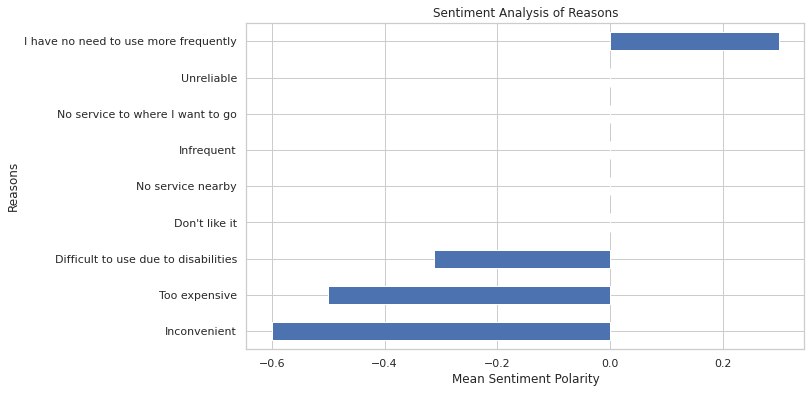

In [128]:
from textblob import TextBlob
import matplotlib.pyplot as plt
# 'Reason' column contains text data for sentiment analysis
text_column = 'Reason'

# Perform sentiment analysis using TextBlob
df['Sentiment'] = df[text_column].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
df.groupby('Reason')['Sentiment'].mean().sort_values().plot(kind='barh')
plt.title('Sentiment Analysis of Reasons')
plt.xlabel('Mean Sentiment Polarity')
plt.ylabel('Reasons')
plt.show()

In [31]:
# Display the DataFrame with sentiment analysis results
sentiment_table = df[['Reason', 'Sentiment']]
sentiment_table= sentiment_table.drop_duplicates(subset='Sentiment').sort_values(ascending=True,by='Sentiment')
sentiment_table.to_csv('sentiment_results.csv', index=False)
sentiment_table

,Reason,Sentiment
7,Difficult to use due to disabilities,-0.3612
3,Inconvenient,-0.3400
4,No service nearby,-0.2960
6,Don't like it,-0.2755
5,No service to where I want to go,-0.2263
0,Too expensive,0.0000


## Sentiment Analysis using VADER

In [3]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [11]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     |████████████████████████████████| 12.8 MB 21.1 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install stanfordnlp

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     |████████████████████████████████| 158 kB 22.0 MB/s eta 0:00:01
     |███████████████                 | 315.9 MB 150.0 MB/s eta 0:00:03

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 670.2 MB 199 bytes/s ta 0:00:01
     |████████████████████████████████| 89.3 MB 6.0 kB/s  eta 0:00:01
     |██████████████████████▍         | 287.2 MB 128.6 MB/s eta 0:00:01

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 410.6 MB 1.4 kB/s s eta 0:00:01
     |████████████████████████████████| 121.6 MB 19 kB/s s eta 0:00:01
     |████████████████████████████████| 124.2 MB 8.2 kB/s  eta 0:00:01
     |████████████████████████████████| 56.5 MB 73 kB/s s eta 0:00:01
     |████████████████████████████████| 209.8 MB 1.1 kB/s s eta 0:00:01
ERROR: Could not install packages due to an OSError: [Errno 122] Disk quota exceeded

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/44d0387b-deba-4fb3-a3ba-f192c2622970/nltk_data..
[nltk_data]     .
[nltk_data]   Package vader_lexicon is already up-to-date!


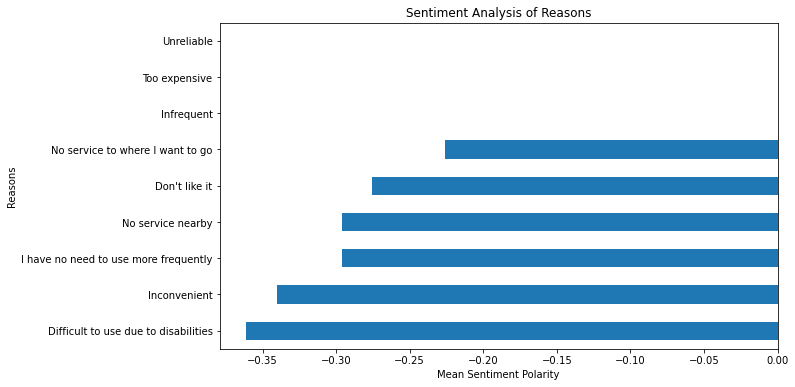

In [47]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Assuming 'df' is your DataFrame with the 'Reason' column
text_column = 'Reason'

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'Reason' column
df['Sentiment'] = df[text_column].apply(lambda x: sid.polarity_scores(str(x))['compound'])

import matplotlib.pyplot as plt

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
df.groupby('Reason')['Sentiment'].mean().sort_values().plot(kind='barh')
plt.title('Sentiment Analysis of Reasons')
plt.xlabel('Mean Sentiment Polarity')
plt.ylabel('Reasons')
plt.show()


In [49]:
# Display the DataFrame
df[['Reason', 'Sentiment']].drop_duplicates()

,Reason,Sentiment
0,Too expensive,0.0000
1,Unreliable,0.0000
2,Infrequent,0.0000
3,Inconvenient,-0.3400
4,No service nearby,-0.2960
5,No service to where I want to go,-0.2263
6,Don't like it,-0.2755
7,Difficult to use due to disabilities,-0.3612
8,I have no need to use more frequently,-0.2960


# Dashboard

In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dash.exceptions import PreventUpdate
from country_converter import CountryConverter

cc = CountryConverter()

# Load the dataset
df = pd.read_csv('final_merged_df.csv')
df['country_iso3'] = cc.convert(
    df['Country'], to="iso3")

df = df.dropna()
df['Year'] = df['Year'].astype('int').astype('str')
df['Passenger Transport'] = df['Passenger Transport'].astype('int')
df = df.dropna()
df_2020 = df.query("Year == '2020'")

# Load the correlation matrix
correlation_matrix = pd.read_csv('correlation_matrix.csv', index_col=0)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div(children=[
    html.H1(children='Interactive Dashboard'),

    # Visualization 1: Colored Map
    html.Div([
        dcc.Graph(id='the_graph')
    ]),

    html.Div([
        dcc.Input(id='input_state', type='number', inputMode='numeric', value=2022,
                  max=2022, min=2011, step=1, required=True),
        html.Button(id='submit_button', n_clicks=0, children='Submit'),
        html.Div(id='output_state'),
    ], style={'text-align': 'center'}),
])

# Callback to update the choropleth map based on the selected year
@app.callback(
    [Output('output_state', 'children'),
     Output(component_id='the_graph', component_property='figure')],
    [Input(component_id='submit_button', component_property='n_clicks')],
    [State(component_id='input_state', component_property='value')]
)
def update_output(num_clicks, val_selected):
    if val_selected is None:
        raise PreventUpdate
    else:
        df_selected = df.query("Year == '{}'".format(val_selected))
        figure = px.choropleth(df_selected, locations='country_iso3', color="Passenger Transport",
                               hover_name="Country", animation_frame="Year", projection='natural earth',
                               color_continuous_scale=px.colors.sequential.Plasma, scope='europe',
                               title='Choropleth showing Passenger Transport')
        figure.update_layout(title=dict(font=dict(size=28), x=0.5, xanchor='center'),
                             margin=dict(l=60, r=60, t=50, b=50))

        return ('The input value was "{}" and the button has been \
                clicked {} times'.format(val_selected, num_clicks), figure)
# Add the remaining visualizations to the layout

# Visualization 2: Treemap
app.layout.children.append(html.Div([
    dcc.Graph(
        id='treemap',
        figure=px.treemap(
            df,
            path=['Country', 'Year'],
            values='% Pov risk by dou',
            title='% Pov risk by urbanization degree for Country'
        )
    )
]))

# Visualization 3: Correlation Matrix Heatmap
app.layout.children.append(html.Div([
    dcc.Graph(
        id='correlation-heatmap',
        figure=px.imshow(
            correlation_matrix,
            labels=dict(x='Features', y='Features', color='Correlation'),
            title='Correlation Matrix Heatmap'
        )
    )
]))

# Fourth Visualization
app.layout.children.append(html.Div([
    dcc.Graph(id='scatter-plot',
              figure=px.scatter(
                  df,
                  x='Passenger Transport',
                  y='% Pov risk by dou',
                  animation_frame='Year',
                  color='Country',
                  title='Scatter Plot: Passenger Transport vs % Pov risk by dou',
              ))
]))

# Fifth Visualization: Bar plot for Pop Distribution for each country over the years
app.layout.children.append(html.Div([
    dcc.Graph(id='bar_plot', figure=px.bar(
        df,
        x='Country',
        y='Pop Distribution',
        animation_frame='Year',
        title='Bar Plot: Pop Distribution for each Country over the Years',
    ))
]))

# Run the app
if __name__ == '__main__':
    app.run_server(mode='external',port=8070)

C:\Users\tahai\AppData\Local\Temp\ipykernel_11220\1001587129.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\tahai\AppData\Local\Temp\ipykernel_11220\1001587129.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
